In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

In [2]:
df0 = pd.read_excel("Dry_Bean_Dataset.xlsx")

In [3]:

from sklearn.model_selection import train_test_split

In [4]:
## split the data into test and train datasets
df1train, df1test = train_test_split(df0, test_size = .25, random_state = 12345)

In [5]:
## confirm it worked how it was intended
print(df1test.shape)
print(df1train.shape)

(3403, 17)
(10208, 17)


In [6]:
### attempt pca
pca2 = PCA(n_components=16)
df2 = pca2.fit_transform(df1train.drop(["Class"], axis = 1))
vars = pca2.explained_variance_ratio_
print(vars)
cum_var = []
num = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
for x in vars:
  if cum_var == []:
    cum_var.append(x)
  else:
    cum_var.append(cum_var[-1] + x)
#print(cum_var)

[9.99966758e-01 3.10893734e-05 1.90344618e-06 2.24620687e-07
 2.46655507e-08 3.49124652e-10 1.12681814e-12 7.39616225e-13
 1.15832845e-13 3.13431751e-14 7.08868039e-15 1.22988921e-15
 2.02773117e-16 5.93847687e-18 4.56423382e-18 1.46409023e-19]


from this we can see that only the first component is very significant. 

In [7]:
pca = PCA(n_components=1)
df3 = pca.fit_transform(df1train.drop(["Class"], axis = 1))

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7, init='random', max_iter=300, random_state=0)
pred_labels = kmeans.fit_predict(df3)

In [9]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df1train['class1']= label_encoder.fit_transform(df1train['Class'])


In [10]:
df1train["class_pred"] = pred_labels

In [11]:
for x in range(0,7):
    temp = df1train[df1train["class_pred"] == x]
    temp1 = temp["class1"]
    temp2 = temp1.value_counts()
    print("Cluster number ", x)
    print()
    print(temp2)
    print()
    print("proportion of the largest component: ", max(temp2)/len(temp1))

Cluster number  0

6    1224
4     520
5     366
0      49
2       6
Name: class1, dtype: int64

proportion of the largest component:  0.5653579676674365
Cluster number  1

2    378
0    169
1      7
4      1
Name: class1, dtype: int64

proportion of the largest component:  0.6810810810810811
Cluster number  2

1    393
Name: class1, dtype: int64

proportion of the largest component:  1.0
Cluster number  3

4    708
0    273
2    138
6     70
5     23
Name: class1, dtype: int64

proportion of the largest component:  0.5841584158415841
Cluster number  4

3    1745
5     121
6      10
4       5
Name: class1, dtype: int64

proportion of the largest component:  0.9276980329611909
Cluster number  5

2    701
0    493
4     69
Name: class1, dtype: int64

proportion of the largest component:  0.555027711797308
Cluster number  6

5    1024
3     950
6     652
4     111
0       2
Name: class1, dtype: int64

proportion of the largest component:  0.3738590726542534


clusters 4 and 2 did pretty well, but the rest have a significant proportion of other bean types.

In [12]:
##trying with more clusters
kmeans2 = KMeans(n_clusters=14, init='random', max_iter=300, random_state=0)
pred_labels2 = kmeans2.fit_predict(df3)
df1train["class_pred2"] = pred_labels2

In [13]:
for x in range(0,14):
    temp = df1train[df1train["class_pred2"] == x]
    temp1 = temp["class1"]
    temp2 = temp1.value_counts()
    print("Cluster number ", x)
    #print()
    #print(temp2)
    print("number of observations: ", len(temp1))
    print("proportion of the largest component: ", max(temp2)/len(temp1))

Cluster number  0
number of observations:  667
proportion of the largest component:  0.679160419790105
Cluster number  1
number of observations:  1159
proportion of the largest component:  0.8343399482312338
Cluster number  2
number of observations:  1365
proportion of the largest component:  0.44761904761904764
Cluster number  3
number of observations:  615
proportion of the largest component:  0.4878048780487805
Cluster number  4
number of observations:  1112
proportion of the largest component:  0.6348920863309353
Cluster number  5
number of observations:  172
proportion of the largest component:  0.6976744186046512
Cluster number  6
number of observations:  873
proportion of the largest component:  0.997709049255441
Cluster number  7
number of observations:  430
proportion of the largest component:  0.6697674418604651
Cluster number  8
number of observations:  620
proportion of the largest component:  0.6419354838709678
Cluster number  9
number of observations:  610
proportion of t

In [24]:
pca2 = PCA(n_components=2)
df4 = pca2.fit_transform(df1train.drop(["Class", "class1", "class_pred", "class_pred2"], axis = 1))

In [25]:
kmeans3 = KMeans(n_clusters=14, init='random', max_iter=300, random_state=0)
pred_labels3 = kmeans3.fit_predict(df4)
df1train["class_pred3"] = pred_labels3

In [26]:
for x in range(0,14):
    temp = df1train[df1train["class_pred3"] == x]
    temp1 = temp["class1"]
    temp2 = temp1.value_counts()
    print("Cluster number ", x)
    #print()
    #print(temp2)
    print("number of observations: ", len(temp1))
    print("proportion of the largest component: ", max(temp2)/len(temp1))

Cluster number  0
number of observations:  636
proportion of the largest component:  0.690251572327044
Cluster number  1
number of observations:  1141
proportion of the largest component:  0.8571428571428571
Cluster number  2
number of observations:  1364
proportion of the largest component:  0.4626099706744868
Cluster number  3
number of observations:  603
proportion of the largest component:  0.472636815920398
Cluster number  4
number of observations:  1165
proportion of the largest component:  0.6274678111587982
Cluster number  5
number of observations:  171
proportion of the largest component:  0.7017543859649122
Cluster number  6
number of observations:  819
proportion of the largest component:  0.9975579975579976
Cluster number  7
number of observations:  426
proportion of the largest component:  0.6713615023474179
Cluster number  8
number of observations:  598
proportion of the largest component:  0.6438127090301003
Cluster number  9
number of observations:  620
proportion of th

still not working very well, but since the second component dicnt contain much avrience this is expected.

In [37]:
#print(df1train.drop(["Class", "class1", "class_pred", "class_pred2"], axis = 1))

In [27]:
import matplotlib.pyplot as plt


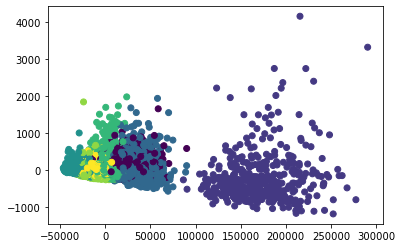

In [36]:
plt.scatter(df4[:,0], df4[:,1], c = df1train['class1'])
